In [39]:
import torch
from torch import nn

import os
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Binary Classification

In [40]:
from sklearn.datasets import make_circles

circles = make_circles(n_samples=1000, shuffle=True, random_state=42)
circles

(array([[ 0.77230531,  0.20867321],
        [-0.78934876,  0.13010973],
        [-0.79369176,  0.10026659],
        ...,
        [-0.14990505, -0.7858298 ],
        [ 0.68454711, -0.72896863],
        [ 0.28501926,  0.95852179]], shape=(1000, 2)),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1

In [41]:
circles[0].shape, circles[1].shape

((1000, 2), (1000,))

In [42]:
X = circles[0]
y = circles[1]

X

array([[ 0.77230531,  0.20867321],
       [-0.78934876,  0.13010973],
       [-0.79369176,  0.10026659],
       ...,
       [-0.14990505, -0.7858298 ],
       [ 0.68454711, -0.72896863],
       [ 0.28501926,  0.95852179]], shape=(1000, 2))

In [43]:
df = pd.DataFrame(X, columns=['x1', 'x2'])
df['label'] = y

df

,x1,x2,label
0,0.772305,0.208673,1
1,-0.789349,0.130110,1
2,-0.793692,0.100267,1
3,-0.340623,0.723862,1
4,0.437116,-0.899405,0
...,...,...,...
995,0.236499,0.971632,0
996,-0.968583,-0.248690,0
997,-0.149905,-0.785830,1
998,0.684547,-0.728969,0


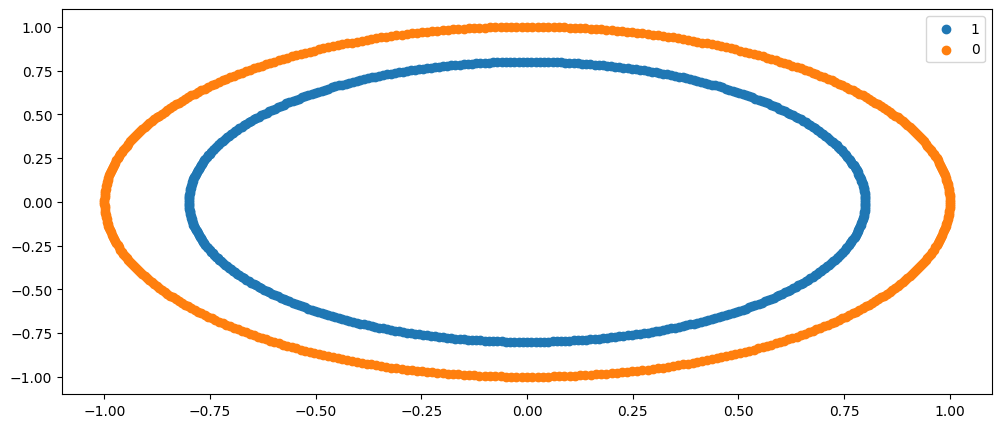

In [44]:
plt.figure(figsize=(12, 5))
plt.scatter(x=df.loc[df.label==1]['x1'], y=df.loc[df.label==1]['x2'], label="1")
plt.scatter(x=df.loc[df.label==0]['x1'], y=df.loc[df.label==0]['x2'], label="0")

plt.legend()
plt.show()

In [45]:
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
device

'mps'

In [46]:
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

X.shape, y.shape

(torch.Size([1000, 2]), torch.Size([1000]))

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train = X_train.to(device=device)
X_test = X_test.to(device=device)
y_train = y_train.to(device=device)
y_test = y_test.to(device=device)

((X_train.shape, y_train.shape), (X_test.shape, y_test.shape))

((torch.Size([900, 2]), torch.Size([900])),
 (torch.Size([100, 2]), torch.Size([100])))

In [48]:
class LogisticModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Sequential(
            nn.Linear(in_features=2, out_features=32, device=device),
            nn.ReLU(),
            nn.Linear(in_features=32, out_features=128, device=device),
            nn.ReLU(),
            nn.Linear(in_features=128, out_features=1, device=device)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear(x)
    
model = LogisticModel()
model, model.parameters(), model.state_dict(), next(model.parameters()).device

(LogisticModel(
   (linear): Sequential(
     (0): Linear(in_features=2, out_features=32, bias=True)
     (1): ReLU()
     (2): Linear(in_features=32, out_features=128, bias=True)
     (3): ReLU()
     (4): Linear(in_features=128, out_features=1, bias=True)
   )
 ),
 <generator object Module.parameters at 0x16b09dd20>,
 OrderedDict([('linear.0.weight',
               tensor([[ 0.3501, -0.1062],
                       [-0.1291, -0.4220],
                       [-0.2322,  0.4144],
                       [-0.5500,  0.6042],
                       [-0.5821, -0.4530],
                       [ 0.5046,  0.5511],
                       [ 0.2807,  0.3744],
                       [-0.3336,  0.4359],
                       [-0.3560,  0.4935],
                       [ 0.0540, -0.2607],
                       [-0.5593, -0.5910],
                       [-0.7064, -0.1746],
                       [-0.5809, -0.0296],
                       [-0.6832,  0.1942],
                       [-0.6523,  0.6934],


In [49]:
model.eval()

with torch.no_grad():
    preds = model(X_test)

preds[:10], y_test[:10]

(tensor([[0.0913],
         [0.1573],
         [0.0160],
         [0.1221],
         [0.1835],
         [0.1999],
         [0.2303],
         [0.2558],
         [0.0174],
         [0.1702]], device='mps:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='mps:0'))

In [50]:
model.eval()

with torch.no_grad():
    preds = torch.round(torch.sigmoid(model(X_test)))

preds[:10].squeeze(), y_test[:10]

(tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], device='mps:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='mps:0'))

In [51]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=1e-2)

loss_fn, optimizer

(BCEWithLogitsLoss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.01
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

In [52]:
def accuracy(act, pred):
    return (act == pred).sum()/len(act)

In [53]:
epochs = 4000
training_losses = []
test_losses = []

for epoch in range(epochs):
    model.train()
    preds = model(X_train).squeeze()
    loss = loss_fn(preds, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    training_losses.append(loss.cpu().detach())
    train_accuracy = accuracy(y_train, torch.round(torch.sigmoid(preds)))

    model.eval()
    with torch.inference_mode():
        pred = model(X_test).squeeze()
        test_loss = loss_fn(pred, y_test)
        test_losses.append(test_loss.cpu().detach())
        test_accuracy = accuracy(y_test, torch.round(torch.sigmoid(pred)))

    if epoch%100==0:
        print(f"Epoch: {epoch}, Train loss: {loss}, Test loss: {test_loss}, Train accuracy: {train_accuracy}, Test accuracy: {test_accuracy}")

Epoch: 0, Train loss: 0.6979153156280518, Test loss: 0.6997764706611633, Train accuracy: 0.5488888621330261, Test accuracy: 0.5699999928474426
Epoch: 100, Train loss: 0.6922861337661743, Test loss: 0.6955673098564148, Train accuracy: 0.5099999904632568, Test accuracy: 0.5199999809265137
Epoch: 200, Train loss: 0.6898425221443176, Test loss: 0.6934472322463989, Train accuracy: 0.5177778005599976, Test accuracy: 0.49000000953674316
Epoch: 300, Train loss: 0.6878731846809387, Test loss: 0.6914219260215759, Train accuracy: 0.5244444608688354, Test accuracy: 0.4699999988079071
Epoch: 400, Train loss: 0.6859882473945618, Test loss: 0.6893644332885742, Train accuracy: 0.5377777814865112, Test accuracy: 0.46000000834465027
Epoch: 500, Train loss: 0.6841034889221191, Test loss: 0.6872605681419373, Train accuracy: 0.5488888621330261, Test accuracy: 0.47999998927116394
Epoch: 600, Train loss: 0.6821996569633484, Test loss: 0.6851493120193481, Train accuracy: 0.5733333230018616, Test accuracy: 0.5

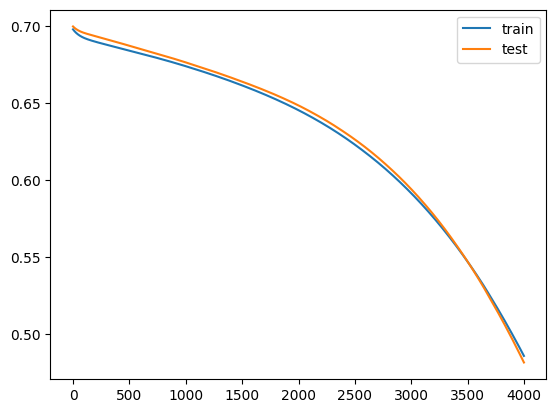

In [75]:
plt.plot(training_losses, label='train')
plt.plot(test_losses, label='test')

plt.legend()
plt.show()

In [59]:
model.eval()

with torch.no_grad():
    predx = torch.round(torch.sigmoid(model(X_test))).squeeze()

predx[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='mps:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='mps:0'))

In [60]:
import numpy as np

def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


# Plot linear data or training and test and predictions (optional)
def plot_predictions(
    train_data, train_labels, test_data, test_labels, predictions=None
):
    """
  Plots linear training data and test data and compares predictions.
  """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})

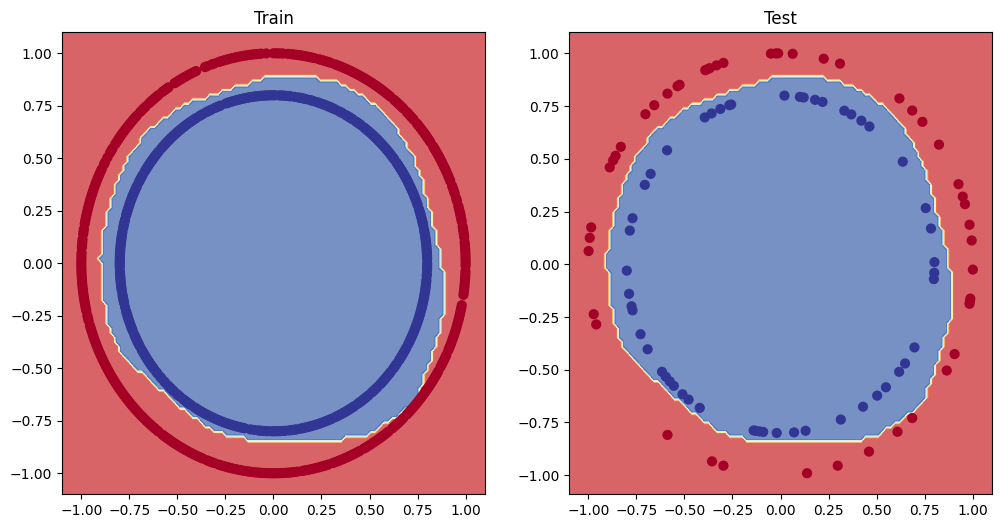

In [61]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)

# Multi class classification

In [63]:
from sklearn.datasets import make_blobs

blobs = make_blobs(n_samples=1000, n_features=2, centers=4, cluster_std=1.5, random_state=52)
blobs[0].shape, blobs[1].shape

((1000, 2), (1000,))

In [67]:
X = torch.from_numpy(blobs[0]).type(torch.float32).to(device=device)
y = torch.from_numpy(blobs[1]).type(torch.float32).to(device=device)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=52)

X_train = X_train.to(device=device)
X_test = X_test.to(device=device)
y_train = y_train.to(device=device)
y_test = y_test.to(device=device)

((X_train.shape, y_train.shape), (X_test.shape, y_test.shape))

((torch.Size([900, 2]), torch.Size([900])),
 (torch.Size([100, 2]), torch.Size([100])))

In [69]:
df = pd.DataFrame(blobs[0], columns=['x1', 'x2'])
df['label'] = blobs[1]

df

,x1,x2,label
0,-9.398007,9.857646,3
1,7.507985,-8.877899,0
2,-6.757528,1.991158,1
3,-8.986775,4.412048,2
4,-6.958036,1.879187,1
...,...,...,...
995,5.911932,-10.954869,0
996,7.190238,-10.592256,0
997,-9.497749,2.009195,2
998,-7.303837,1.834295,2


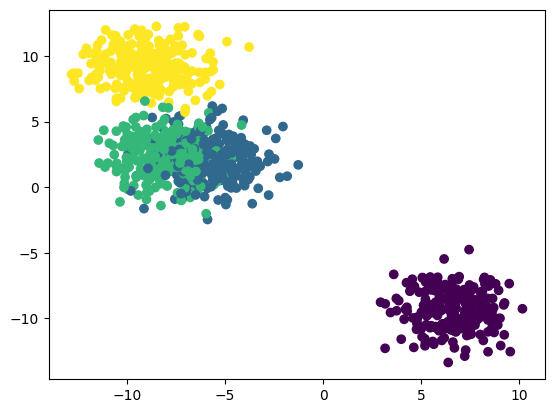

In [70]:
plt.scatter(x=df['x1'], y=df['x2'], c=df['label'])

In [92]:
class BlobModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(in_features=2, out_features=32, device=device),
            nn.Tanh(),
            nn.Linear(in_features=32, out_features=128, device=device),
            nn.ReLU(),
            nn.Linear(in_features=128, out_features=4, device=device)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layers(x)
    
model = BlobModel()
model, model.state_dict(), next(model.parameters()).device

(BlobModel(
   (layers): Sequential(
     (0): Linear(in_features=2, out_features=32, bias=True)
     (1): Tanh()
     (2): Linear(in_features=32, out_features=128, bias=True)
     (3): ReLU()
     (4): Linear(in_features=128, out_features=4, bias=True)
   )
 ),
 OrderedDict([('layers.0.weight',
               tensor([[ 0.2658,  0.3878],
                       [-0.4272,  0.6010],
                       [ 0.0633, -0.6993],
                       [ 0.4612, -0.1864],
                       [-0.3196,  0.0061],
                       [-0.4219,  0.2266],
                       [ 0.3469, -0.0783],
                       [ 0.4536, -0.5741],
                       [-0.1596, -0.1966],
                       [ 0.2148, -0.1036],
                       [ 0.2228,  0.3865],
                       [ 0.6379,  0.2852],
                       [-0.5894,  0.2123],
                       [-0.4144,  0.5188],
                       [-0.3088,  0.4987],
                       [-0.2983, -0.4568],
               

In [93]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=1e-2)

In [94]:
preds = model(X_test)
preds[:5], torch.argmax(preds[:5], dim=1), y_test[:5]

(tensor([[ 0.1282, -0.1140, -0.1896, -0.2181],
         [ 0.1841, -0.1278, -0.0783, -0.2081],
         [ 0.1517, -0.1145, -0.1591, -0.1904],
         [ 0.2062, -0.1948,  0.0588,  0.2590],
         [ 0.1439, -0.1080, -0.1671, -0.1934]], device='mps:0',
        grad_fn=<SliceBackward0>),
 tensor([0, 0, 0, 3, 0], device='mps:0'),
 tensor([1., 1., 2., 0., 1.], device='mps:0'))

In [95]:
epochs = 3000
training_losses = []
test_losses = []

for epoch in range(epochs):
    model.train()
    logits = model(X_train)
    preds = torch.softmax(logits, dim=1).argmax(dim=1)
    loss = loss_fn(logits, y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    train_accuracy = accuracy(preds, y_train)
    training_losses.append(loss.cpu().detach())

    model.eval()
    with torch.no_grad():
        test_logits = model(X_test)
        test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)
        test_accuracy = accuracy(test_preds, y_test)
        test_loss = loss_fn(test_logits, y_test)
        test_losses.append(test_loss.cpu().detach())

    if epoch%100==0:
        print(f"Epoch: {epoch}, Train loss: {loss}, Test loss: {test_loss}, Train accuracy: {train_accuracy}, Test accuracy: {test_accuracy}")

Epoch: 0, Train loss: 1.4501760005950928, Test loss: 1.4092717170715332, Train accuracy: 0.03777777776122093, Test accuracy: 0.17000000178813934
Epoch: 100, Train loss: 0.6335245370864868, Test loss: 0.6573020815849304, Train accuracy: 0.7711111307144165, Test accuracy: 0.6899999976158142
Epoch: 200, Train loss: 0.5033078789710999, Test loss: 0.530290424823761, Train accuracy: 0.7833333611488342, Test accuracy: 0.7400000095367432
Epoch: 300, Train loss: 0.45842039585113525, Test loss: 0.4847518801689148, Train accuracy: 0.7855555415153503, Test accuracy: 0.7900000214576721
Epoch: 400, Train loss: 0.4362386465072632, Test loss: 0.4617593288421631, Train accuracy: 0.7922222018241882, Test accuracy: 0.8100000023841858
Epoch: 500, Train loss: 0.42217037081718445, Test loss: 0.44707322120666504, Train accuracy: 0.801111102104187, Test accuracy: 0.8299999833106995
Epoch: 600, Train loss: 0.4116091728210449, Test loss: 0.4360889494419098, Train accuracy: 0.8088889122009277, Test accuracy: 0.8

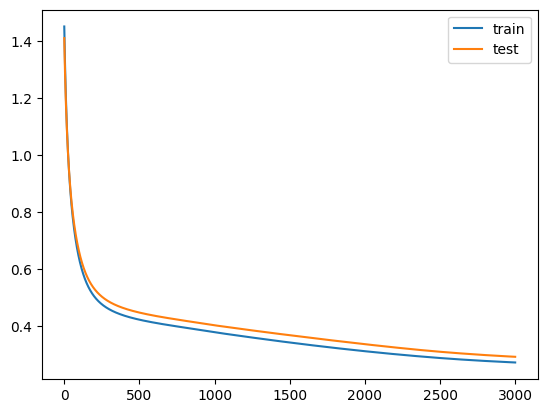

In [96]:
plt.plot(training_losses, label='train')
plt.plot(test_losses, label='test')

plt.legend()
plt.show()

In [99]:
model.eval()

with torch.no_grad():
    preds = torch.softmax(model(X_test), dim=1).argmax(dim=1)

preds, y_test, accuracy(preds, y_test)

(tensor([2, 1, 2, 0, 1, 2, 3, 1, 1, 3, 2, 1, 2, 1, 2, 3, 1, 3, 3, 2, 1, 1, 0, 0,
         0, 2, 2, 2, 0, 0, 2, 0, 3, 1, 0, 3, 0, 2, 3, 3, 3, 0, 1, 2, 2, 0, 3, 1,
         3, 3, 3, 1, 1, 1, 1, 3, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 0, 1, 0, 2, 1, 2,
         0, 3, 2, 1, 0, 2, 2, 2, 0, 0, 1, 3, 0, 0, 1, 1, 2, 3, 1, 2, 2, 0, 1, 1,
         0, 0, 3, 2], device='mps:0'),
 tensor([1., 1., 2., 0., 1., 2., 3., 1., 1., 3., 2., 2., 2., 1., 2., 3., 2., 3.,
         3., 2., 1., 1., 0., 0., 0., 2., 2., 2., 0., 0., 1., 0., 2., 1., 0., 3.,
         0., 2., 3., 3., 3., 0., 1., 1., 1., 0., 3., 1., 3., 3., 3., 2., 1., 1.,
         1., 3., 0., 1., 0., 2., 1., 2., 2., 0., 1., 2., 0., 1., 0., 2., 1., 2.,
         0., 3., 2., 1., 0., 1., 2., 1., 0., 0., 1., 3., 0., 0., 1., 1., 2., 3.,
         2., 1., 2., 0., 1., 1., 0., 0., 3., 2.], device='mps:0'),
 tensor(0.8700, device='mps:0'))

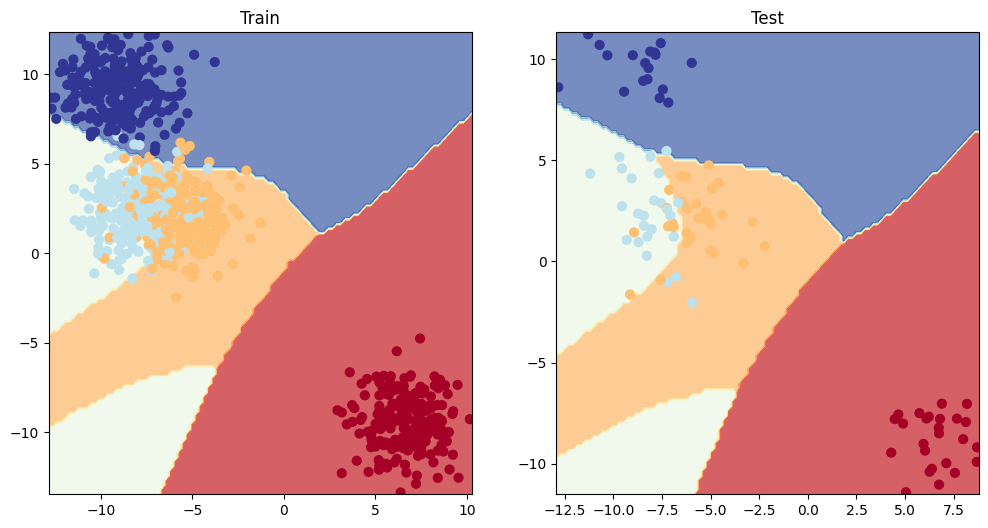

In [100]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)